# 2 Motional Modes

$$H_0=\eta_x\Omega_x\sigma_x\left(a_x^\dagger e^{i\delta t}+a_xe^{-i\delta t}\right)+\eta_y\Omega_y\sigma_y\left(a_y^\dagger e^{i\delta t}+a_ye^{-i\delta t}\right)$$
$$H_I = \sum_{q = x, y}\delta a_q^\dagger a_q+\eta_q\Omega_q\sigma_q\left(a_q^\dagger+a_q\right)$$

In [57]:
import qutip as qt
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from numpy.polynomial.hermite import *

In [103]:
nMax = 30
times = np.linspace(0, 30, 101)
n0 = 0
psi = qt.tensor(qt.basis(2, 1), qt.coherent(nMax, n0))
# psi = qt.coherent(nMax, n0)

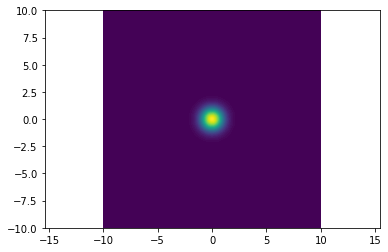

In [104]:
xvec = np.linspace(-10, 10, 200)
yvec = np.linspace(-10, 10, 200)
W_psi = qt.wigner(qt.coherent(nMax, n0), xvec, yvec)

# plot the results

# fig, axes = plt.subplots(1, 3, figsize=(24, 8))

plt.contourf(xvec, yvec, W_psi, 100)
plt.axis("equal")
plt.show()

## Test 2d case Wigner func

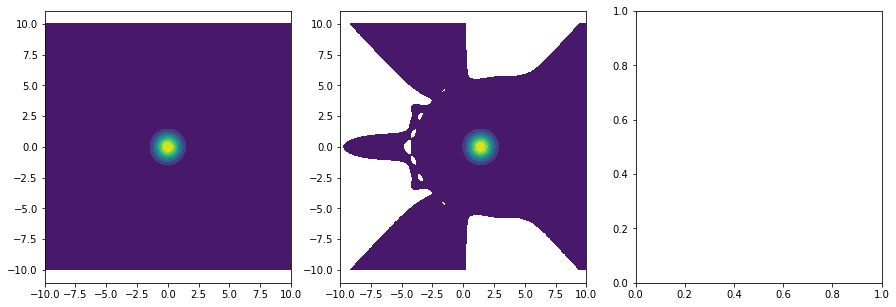

In [217]:
nMax = 30

psi_2d = qt.tensor(qt.ket2dm(qt.coherent(nMax, 1)), qt.ket2dm(qt.coherent(nMax, 0)))
psi_x = psi_2d.ptrace(1)
psi_y = psi_2d.ptrace(0)

W_x = qt.wigner(psi_x, xvec, yvec)
W_y = qt.wigner(psi_y, xvec, yvec)
# W_2d = qt.wigner(psi_2d, xvec, yvec)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].contourf(xvec, yvec, W_x)
axes[0].axis('equal')
axes[1].contourf(xvec, yvec, W_y)
axes[1].axis('equal')
# axes[2].contourf(xvec, yvec, W_2d)
# axes[2].axis('equal')
plt.show()
# [W_x[0], W_y[0]]
# W_x

## 1d case:

In [218]:
def H_1d(Omega, delta, psi_0, gamma, eta=0.1, n0=0):
    H_x1 = eta*Omega*qt.tensor(qt.sigmax(), qt.create(nMax))
    def H_x1_coeff(t, args):
        return np.exp(1j*delta*t)
    H_x2 = eta*Omega*qt.tensor(qt.sigmax(), qt.destroy(nMax))
    def H_x2_coeff(t, args):
        return np.exp(-1j*delta*t)
    H = H_x1+H_x2
    
    H = [[H_x1, H_x1_coeff], [H_x2, H_x2_coeff]]
    
    c_ops = []#[gamma**qt.tensor(qt.basis(2, 0)*qt.basis(2, 1).dag(), qt.qeye(nMax))]

#     H = eta*Omega*qt.tensor(qt.sigmax(), (qt.create(nMax))+qt.destroy(nMax))
    
    result = qt.mesolve(H, psi_0, times, c_ops, [])
    return result.states

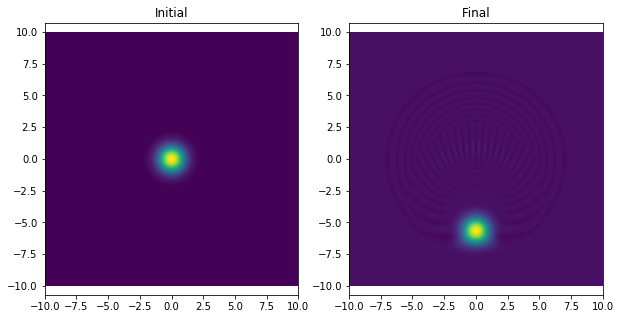

In [221]:
Omega = 1
delta = 0.
gamma = 0
times = np.linspace(0, 40, 101)
p_spin = (qt.fock(2, 0)+qt.fock(2, 1)).unit()
psi = qt.tensor(p_spin, qt.coherent(nMax, 0))

psi_f = H_1d(Omega, delta, psi, gamma)[-1].ptrace(1)
W_i = qt.wigner(psi.ptrace(1), xvec, yvec)
W_f = qt.wigner(psi_f, xvec, yvec)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
cont0 = axes[0].contourf(xvec, yvec, W_i, 100)
axes[0].axis('equal')
axes[0].set_title('Initial')
cont1 = axes[1].contourf(xvec, yvec, W_f, 100)
axes[1].axis('equal')
axes[1].set_title('Final')
plt.show()
# W_f

## 2d case:

In [36]:
def H(Omega_x, Omega_y, delta, times, eta=0.1, n0=0):
    H_x1 = eta*Omega_x*qt.tensor(qt.tensor(qt.sigmax(), qt.create(nMax)), qt.qeye(nMax))
    def H_x1_coeff(t, args):
        return np.exp(1j*delta*t)
    H_x2 = eta*Omega_x*qt.tensor(qt.tensor(qt.sigmax(), qt.destroy(nMax)), qt.qeye(nMax))
    def H_x2_coeff(t, args):
        return np.exp(-1j*delta*t)
    H_y1 = eta*Omega_y*qt.tensor(qt.tensor(qt.sigmay(), qt.qeye(nMax)), qt.create(nMax))
    def H_y1_coeff(t, args):
        return np.exp(1j*delta*t)
    H_y2 = eta*Omega_y*qt.tensor(qt.tensor(qt.sigmay(), qt.qeye(nMax)), qt.destroy(nMax))
    def H_y2_coeff(t, args):
        return np.exp(-1j*delta*t)
    H = [[H_x1, H_x1_coeff], [H_x2, H_x2_coeff], [H_y1, H_y1_coeff], [H_y2, H_y2_coeff]]
    
    psi_0 = qt.tensor(qt.tensor(qt.basis(2, 0), qt.coherent(nMax, n0)), qt.coherent(nMax, n0))
    
    result = qt.mesolve(H, psi_0, times, [], [])
    return result.states

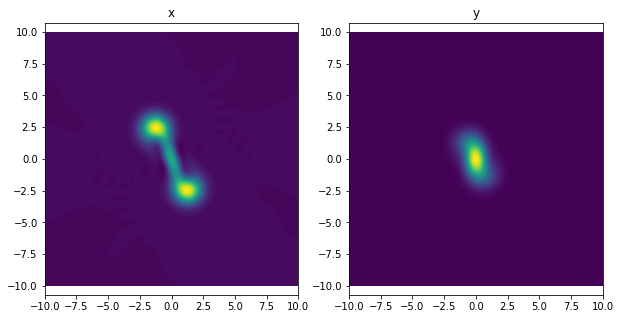

In [37]:
times = np.linspace(0, 20, 101)
Omega_x = 1
Omega_y = 0.5
delta = 0.05
n = 0

psi_2d_f = H(Omega_x, Omega_y, delta, times, n0=n)[-1]
psi_2d_f_x = psi_2d_f.ptrace(1)
psi_2d_f_y = psi_2d_f.ptrace(2)
# W_2d_f = qt.wigner(psi_2d_f, xvec, yvec)
W_2d_f_x = qt.wigner(psi_2d_f_x, xvec, yvec)
W_2d_f_y = qt.wigner(psi_2d_f_y, xvec, yvec)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
cont0 = axes[0].contourf(xvec, yvec, W_2d_f_x, 100)
axes[0].axis('equal')
axes[0].set_title('x')
cont1 = axes[1].contourf(xvec, yvec, W_2d_f_y, 100)
axes[1].axis('equal')
axes[1].set_title('y')
plt.show()

In [222]:
################################################
#
### Plot psi(x) and psi(y) at different Omega_y
#
################################################

# fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ylist = np.linspace(0, 1, 5)
for i in ylist:
    psi_2d_f = H(Omega_x, i, delta, times, n0=n)[-1]
    psi_2d_f_x = psi_2d_f.ptrace(1)
    psi_2d_f_y = psi_2d_f.ptrace(2)
# W_2d_f = qt.wigner(psi_2d_f, xvec, yvec)
    W_2d_f_x = qt.wigner(psi_2d_f_x, xvec, yvec)
    W_2d_f_y = qt.wigner(psi_2d_f_y, xvec, yvec)
#     plt.figure(figsize=(15, 10))
#     ax1 = plt.subplot(2, 2, 1)
#     ax1.plot(W2phi_x(W_2d_f_x))
# #     ax1.set_title('str')
#     ax1.set_title('X, $\Omega_x=1, \Omega_y=$'+str(round(i, 2))+', $\delta=$'+str(delta))
#     ax2 = plt.subplot(2, 2, 2)
#     ax2.plot(W2phi_x(W_2d_f_y))
#     ax2.set_title('Y, $\Omega_x=1, \Omega_y=$'+str(round(i, 2))+', $\delta=$'+str(delta))
#     dirc = '../plots/'
#     plt.savefig('Omega_x=1_Omega_y='+str(round(i, 2))+'_delta='+str(delta)+'.png')

# plt.plot(W2phi_x(W_2d_f_x))

### 2d, time-independent

In [39]:
def H_noT(Omega_x, Omega_y, delta, times, eta=0.1, n0=0):
    H_1 = delta*(qt.tensor(qt.qeye(2), qt.tensor(qt.create(nMax)*qt.destroy(nMax), qt.qeye(nMax)))+qt.tensor(qt.qeye(2), qt.tensor(qt.qeye(nMax), qt.create(nMax)*qt.destroy(nMax))))
    H_2 = eta*(Omega_x*qt.tensor(qt.sigmax(), qt.tensor(qt.create(nMax)+qt.destroy(nMax), qt.qeye(nMax)))\
               +Omega_y*qt.tensor(qt.sigmay(), qt.tensor(qt.qeye(nMax), qt.create(nMax)+qt.destroy(nMax))))
    H = H_1 + H_2
    
    psi_0 = qt.tensor(qt.tensor(qt.basis(2, 0), qt.coherent(nMax, n0)), qt.coherent(nMax, n0))
    
    result = qt.mesolve(H, psi_0, times, [], [])
    return result.states

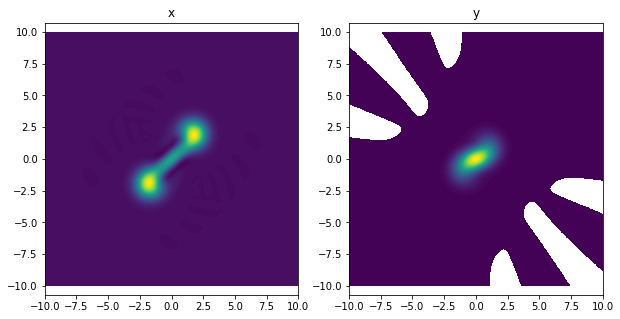

In [187]:
times = np.linspace(0, 20, 101)
Omega_x = 1
Omega_y = 0.5
delta = 0.07
n = 0

psi_2d_f = H_noT(Omega_x, Omega_y, delta, times, n0=n)[-1]
psi_2d_f_x = psi_2d_f.ptrace(1)
psi_2d_f_y = psi_2d_f.ptrace(2)
# W_2d_f = qt.wigner(psi_2d_f, xvec, yvec)
W_2d_f_x = qt.wigner(psi_2d_f_x, xvec, yvec)
W_2d_f_y = qt.wigner(psi_2d_f_y, xvec, yvec)
Q_2d_f_x = qt.qfunc(psi_2d_f_x, xvec, yvec)
Q_2d_f_y = qt.qfunc(psi_2d_f_y, xvec, yvec)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
cont0 = axes[0].contourf(xvec, yvec, W_2d_f_x, 100)
axes[0].axis('equal')
axes[0].set_title('x')
cont1 = axes[1].contourf(xvec, yvec, W_2d_f_y, 100)
axes[1].axis('equal')
axes[1].set_title('y')
plt.show()

In [61]:
# fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# cont0 = axes[0].contourf(xvec, yvec, Q_2d_f_x, 100)
# axes[0].axis('equal')
# axes[0].set_title('x')
# cont1 = axes[1].contourf(xvec, yvec, Q_2d_f_y, 100)
# axes[1].axis('equal')
# axes[1].set_title('y')
# plt.show()

### Test 1d $\psi(x)$:

http://www.stat.physik.uni-potsdam.de/~pikovsky/teaching/stud_seminar/Wigner_function.pdf

$$\psi(x)= \frac{1}{\psi^*(0)}\int W(x/2, p)e^{ipx/\hbar}dp$$
2d case:
$$W(x_1, x_2, p_1, p_2) = \frac{1}{h}\int e^{-i(p_1x_1+p_2x_2)}\psi(x_1+y_1/2, x_2+y_2/2)\psi^*(x_1-y_1/2, x_2-y_2/2)dy_1dy_2$$
$$\psi(x_1, x_2)= \frac{1}{\psi^*(0, 0)}\int W(x_1/2, x_2/2, p_1, p_2)e^{i(p_1x_1+p_2x_2)/\hbar}dp_1dp_2$$

In [23]:
def W2phi_x(W):
    phi_x = []
    for i in range(200):
        x = 0
        for j in range(200):
            x += W[i, j]*np.exp(1j*2*xvec[i]*yvec[j])
        phi_x.append(x)
    return phi_x

In [209]:
# # nMax = 40
# W_psi = qt.wigner(qt.fock(10, 5), xvec, yvec)

# plt.plot(W2phi_x(W_psi))
# plt.show()

## 2d $\psi(x)$:

\begin{align}
|\psi(x_i, y_j)|^2 &= \rho_{x_iy_j, x_iy_j}\\
&= \left<x_i, y_j\left|\rho\right|x_i, y_j\right>\\
&= \sum_{n_x, n_y, n_x', n_y'}\rho_{n_x, n_y, n_x', n_y'}\left<x_i, y_j|n_x,n_y\right>\left<n_x',n_y'|x_i, y_j\right>\\
&= \sum_{n_x, n_y, n_x', n_y'}\rho_{n_x, n_y, n_x', n_y'}\left<x_i|n_x\right>\left<y_j|n_y\right>\left<n_x'|x_i\right>\left<n_y'|y_j\right>
\end{align}

In [52]:
def QHO(n, x):
    m = 1
    w = 1
    h_bar = 1
    herm_coeff = []
    for i in range(n):
        herm_coeff.append(0)
    herm_coeff.append(1)
    return (m*w/(pi*h_bar))**0.25/(math.pow(2, n)*math.factorial(n))**0.5*math.exp(-m*w*x**2/(2*h_bar))*hermval((m*w/h_bar)**0.5*x, herm_coeff)

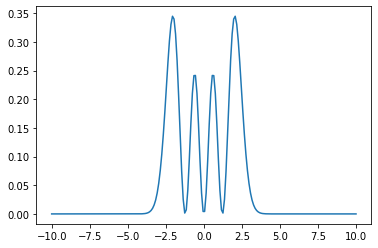

In [129]:
test = []
for i in xvec:
    test.append(QHO(3, i)**2)
    
plt.plot(xvec, test)

### 1d test

In [195]:
nMax = 20
# test = psi_f#qt.thermal_dm(nMax, 0)

In [225]:
p_x = []
# ptest = qt.ket2dm(test)
ptest = psi_f
for k in xvec:
    temp = 0
    for i in range(nMax):
        for j in range(nMax):
            temp += ptest[i][0][j]*QHO(i, k)*QHO(j, k)
    p_x.append(temp)

/home/gloria/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


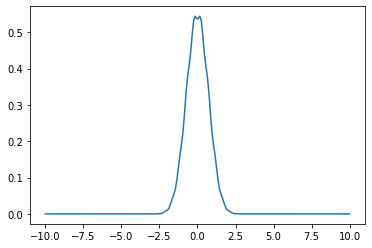

In [226]:
plt.plot(xvec, p_x)

In [177]:
psi_2d_f_x

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[ 3.93732609e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -3.56825236e-02-1.93612041e-01j  0.00000000e+00+0.00000000e+00j
  -1.13004261e-01+1.74339128e-02j  0.00000000e+00+0.00000000e+00j
   2.13736328e-02+6.61513075e-02j  0.00000000e+00+0.00000000e+00j
   2.71845907e-02-2.17404277e-02j  0.00000000e+00+0.00000000e+00j
  -1.25901392e-02-5.89218599e-03j  0.00000000e+00+0.00000000e+00j
   2.99897927e-04+4.55201702e-03j  0.00000000e+00+0.00000000e+00j
   1.05182594e-03-7.08072939e-04j  0.00000000e+00+0.00000000e+00j
  -2.76908545e-04-1.29912111e-04j  0.00000000e+00+0.00000000e+00j
   9.20500287e-06+6.49826241e-05j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  3.74412366e-02+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -1.24018672e-02-3.71466881e-02j
   0.00000000e+00+0.00000000e+00j -1.95429095e-02+1.77755778e-02j
   0.00000000e+00+0.00000000e+00j  1.23492302e-